<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters= 3, n_init=20,
                random_state=42).fit(X_scaled)

In [ ]:
kmeans

KMeans(n_clusters=3, n_init=20, random_state=42)

# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

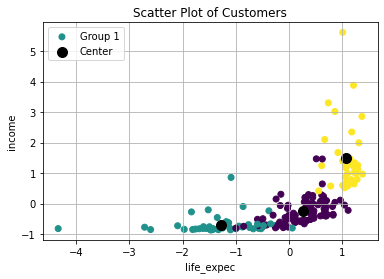

In [ ]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 6
x2_index = 4


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [ ]:
WCSSs=[] #init is num of iterations
Ks=range(1,15)
for k in Ks:
    kmeans= KMeans(n_clusters=k,n_init=30, init="random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

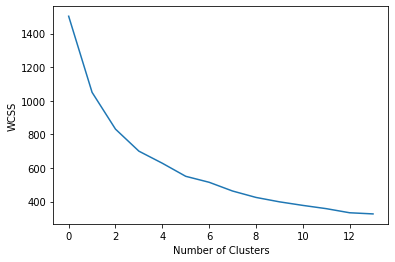

In [ ]:
plt.plot(WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Given that the above graph levels off significantly at k=3 and countries can be labeled as high, medium, and low income with long, average, and low life expectancy, k=3 is a reasonable choice for the number of clusters.

In [ ]:
k=3
kmeans=KMeans(n_clusters=k,n_init=30, init="random").fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. 

In [ ]:
df['cluster_label'] = kmeans.labels_

Mostly African countries in cluster 0.

Most of the countries in cluster 1 are high-income developed countries in Europe.

Cluster 2 has middle-income countries.

In [ ]:
cluster0_countries = [df[df['cluster_label'] ==0]['country']]
cluster0_countries

[0                   Afghanistan
 3                        Angola
 17                        Benin
 21                     Botswana
 25                 Burkina Faso
 26                      Burundi
 28                     Cameroon
 31     Central African Republic
 32                         Chad
 36                      Comoros
 37             Congo, Dem. Rep.
 38                  Congo, Rep.
 40                Cote d'Ivoire
 49            Equatorial Guinea
 50                      Eritrea
 55                        Gabon
 56                       Gambia
 59                        Ghana
 63                       Guinea
 64                Guinea-Bissau
 66                        Haiti
 72                         Iraq
 80                        Kenya
 81                     Kiribati
 84                          Lao
 87                      Lesotho
 88                      Liberia
 93                   Madagascar
 94                       Malawi
 97                         Mali
 99       

In [ ]:
cluster1_countries = [df[df['cluster_label'] ==1]['country']]
cluster1_countries

[7                 Australia
 8                   Austria
 11                  Bahrain
 15                  Belgium
 23                   Brunei
 29                   Canada
 42                   Cyprus
 43           Czech Republic
 44                  Denmark
 53                  Finland
 54                   France
 58                  Germany
 60                   Greece
 68                  Iceland
 73                  Ireland
 74                   Israel
 75                    Italy
 77                    Japan
 82                   Kuwait
 91               Luxembourg
 98                    Malta
 110             Netherlands
 111             New Zealand
 114                  Norway
 122                Portugal
 123                   Qatar
 133               Singapore
 134         Slovak Republic
 135                Slovenia
 138             South Korea
 139                   Spain
 144                  Sweden
 145             Switzerland
 157    United Arab Emirates
 158          

In [ ]:
cluster2_countries = [df[df['cluster_label'] ==2]['country']]
cluster2_countries

[1                  Albania
 2                  Algeria
 4      Antigua and Barbuda
 5                Argentina
 6                  Armenia
               ...         
 160                Uruguay
 161             Uzbekistan
 162                Vanuatu
 163              Venezuela
 164                Vietnam
 Name: country, Length: 84, dtype: object]

# Q6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interpretation

In [ ]:
df.groupby('cluster_label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [ ]:
df.groupby('cluster_label').mean().describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,39.963028,42.711361,7.132414,47.096158,20640.073905,7.430612,70.709766,3.022788,16967.759935
std,46.672033,14.947338,1.453935,4.595758,22078.090449,4.676541,10.627716,1.741546,22224.229996
min,5.000000,29.151277,6.200952,42.323404,3942.404255,2.671250,59.187234,1.752778,1922.382979
25%,13.463690,34.697597,6.294732,44.898404,8123.999747,5.136077,66.000760,2.030139,4204.417680
50%,21.927381,40.243917,6.388511,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
75%,57.444542,49.491403,7.598144,49.482535,28988.908730,9.810293,76.471032,3.657793,24490.448413
max,92.961702,58.738889,8.807778,51.491667,45672.222222,12.019681,80.127778,5.008085,42494.444444


In [ ]:
df.groupby('cluster_label').describe()

child_mort                                                    \
                   count       mean        std   min    25%    50%     75%   
cluster_label                                                                
0                   47.0  92.961702  33.375229  36.9  63.80  90.20  111.00   
1                   36.0   5.000000   2.188933   2.6   3.55   4.20    5.75   
2                   84.0  21.927381  13.757919   4.5  11.65  18.35   28.35   

                     exports             ... total_fer        gdpp  \
                 max   count       mean  ...       75%   max count   
cluster_label                            ...                         
0              208.0    47.0  29.151277  ...    5.6350  7.49  47.0   
1               10.8    36.0  58.738889  ...    1.9575  3.03  36.0   
2               64.4    84.0  40.243917  ...    2.6625  4.34  84.0   

                                                                               \
                       mean           std      min      25%      50%      75%   
cluster_label                                                                   
0               1922.382979   2956.103925    231.0    550.0    897.0   1470.0   
1              42494.444444  18991.079777  16600.0  30675.0  41200.0  48475.0   
2               6486.452381   5021.434052    592.0   2967.5   4670.0   9070.0   

                         
                    max  
cluster_label            
0               17100.0  
1              105000.0  
2               28000.0  

[3 rows x 72 columns]

# Q7.) Write an observation about the descriptive statistics.

There is more variation in the distribution of cluster 1 countries with respect to child mortality, especially compared to cluster 0 countries. However, this relationship is reversed with the variation in the distribution with respect to GDP per capita.  The variation in per capita GDP is much greater in cluster 0 countries.

In [ ]:
n='\n'
print(f'Cluster 0 child mortality variation as percent of mean (std/mean): {(round(33.375229/92.961702,3)*100)}% {n}Cluster 1 child mortality variation as percent of mean (std/mean): {(round(2.188933/5.000000,3)*100)}%')

Cluster 0 child mortality variation as percent of mean (std/mean): 35.9% 
Cluster 1 child mortality variation as percent of mean (std/mean): 43.8%


In [ ]:
print(f'Cluster 0 GDP per capita variation as percent of mean (std/mean): {(round(2956.103925/1922.382979,3)*100)}%{n}Cluster 1 GDP per capita variation as percent of mean (std/mean): {(round(18991.079777/42494.444444,3)*100)}%')

Cluster 0 GDP per capita variation as percent of mean (std/mean): 153.8%
Cluster 1 GDP per capita variation as percent of mean (std/mean): 44.7%
